In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
sys.path.append(os.path.abspath('./../../'))
from cell_extractor.CellDetector import CellDetector
from Controllers.MarkedCellController import MarkedCellController
from Controllers.SqlController import SqlController
from cell_extractor.CellAnnotationUtilities import CellAnnotationUtilities
from matplotlib.patches import Patch
from cell_extractor.diagnostics.ToolKit import get_DataFrame_from_query_result,find_equivalence,find_annotation_in_category,find_agreement,get_DataFrame_from_detection_df


In [2]:
animali = 'DK55'
detector = CellDetector(animali,round = 2)
detections = detector.load_detections()
sures = detections[detections.predictions==2]
unsures = detections[detections.predictions==0]
nodetection = detections[detections.predictions<0]

In [6]:
controller = SqlController()
factor = controller.get_resolution(animali)
controller = MarkedCellController()
search_dict = {'FK_prep_id':animali,'FK_cell_type_id':1}
original = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'original',factor)
original_tool = find_equivalence(original)
search_dict = {'FK_prep_id':animali,'FK_cell_type_id':5}
round1 = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'round1',factor)
round1_positive = round1[['POSITIVE' in i for i in round1.name ]]
round1_negative = round1[['NEGATIVE' in i for i in round1.name ]]
round1_tool = find_equivalence(round1)


calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 3315
after removing duplicates 3315
calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 1861
after removing duplicates 1859


In [9]:
def get_features_in_subcategory(big_category,subcatgory,max_distance=20):
    more_points = np.array([big_category.col,big_category.row,big_category.section]).T.astype(float)
    less_points = np.array([subcatgory.x,subcatgory.y,subcatgory.section]).T.astype(float)
    util = CellAnnotationUtilities()
    ids = util.find_cloest_neighbor_among_points(more_points,less_points,max_distance=max_distance)
    return big_category.iloc[ids]


In [11]:
sure_positive_features = get_features_in_subcategory(sures,round1_positive,max_distance=200)
sure_negative_features = get_features_in_subcategory(sures,round1_negative,max_distance=200)
unsure_positive_features = get_features_in_subcategory(unsures,round1_positive,max_distance=200)
unsure_negative_features = get_features_in_subcategory(unsures,round1_negative,max_distance=200)
false_negative_agreed = get_features_in_subcategory(nodetection,round1_positive,max_distance=300)

skipping, min distance 3600.183306345662
skipping, min distance 237.95540579682043
skipping, min distance 382.03632560640125
skipping, min distance 500.67524227272526
skipping, min distance 203.91804595831056
skipping, min distance 336.69745729880907
skipping, min distance 796.066560952949
skipping, min distance 226.71568097509268
skipping, min distance 475.16487851602426
skipping, min distance 357.2149005949997
skipping, min distance 206.34699619872623
skipping, min distance 647.4387693056394
skipping, min distance 410.88095570774993
skipping, min distance 295.7321917390269
skipping, min distance 280.3347322936925
skipping, min distance 231.81602632080387
skipping, min distance 493.6928820381636
skipping, min distance 581.152811891356
skipping, min distance 599.6016164600788
skipping, min distance 214.8290339925062
skipping, min distance 388.43241962455375
skipping, min distance 212.5097422061969
skipping, min distance 350.25793538730227
skipping, min distance 292.7066370696347
skippi

In [12]:
print(f'sures {len(sure_positive_features),len(sure_negative_features)}')
print(f'unsures {len(unsure_positive_features),len(unsure_negative_features)}')
print(f'false neg {len(false_negative_agreed)}')

sures (1043, 263)
unsures (394, 327)
false neg 1221


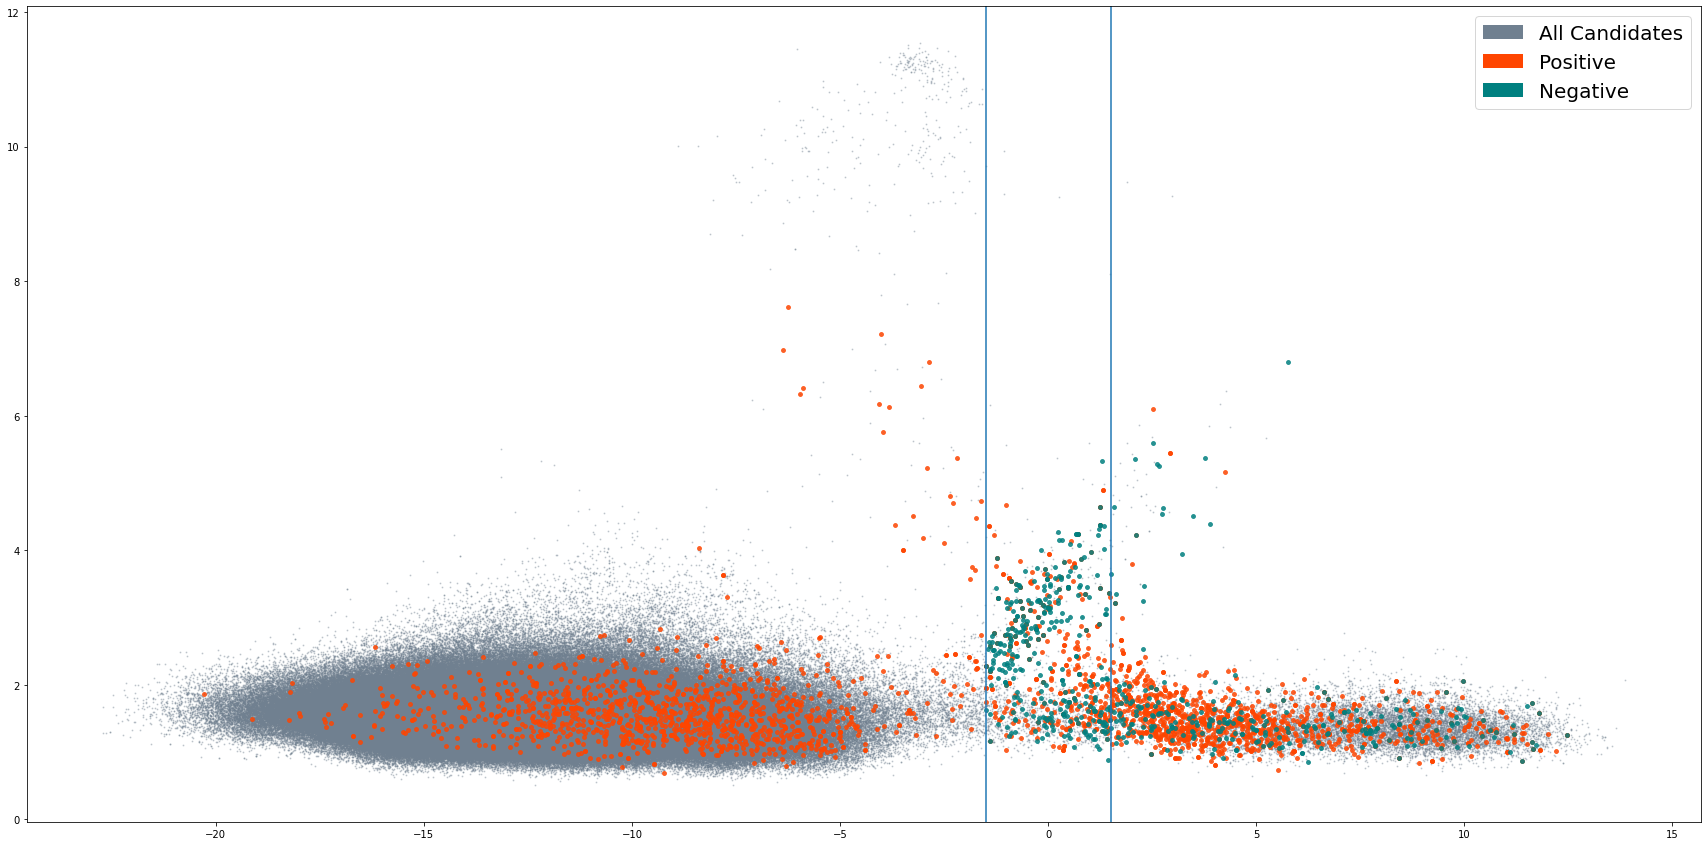

In [17]:
plt.figure(figsize=[30,15])
alpha = 0.8
size = 15
plt.scatter(detections['mean_score'].to_numpy(),detections['std_score'].to_numpy(),color='slategrey',s=1,alpha=0.3)
plt.scatter(sure_positive_features['mean_score'].to_numpy(),sure_positive_features['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
plt.scatter(unsure_positive_features['mean_score'].to_numpy(),unsure_positive_features['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
plt.scatter(sure_negative_features['mean_score'].to_numpy(),sure_negative_features['std_score'].to_numpy(),color='teal',s=size,alpha=alpha)
plt.scatter(unsure_negative_features['mean_score'].to_numpy(),unsure_negative_features['std_score'].to_numpy(),color='teal',s=size,alpha=alpha)
plt.scatter(false_negative_agreed['mean_score'].to_numpy(),false_negative_agreed['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
# plt.xlim([-20,15])
# plt.ylim([0,4])
plt.axvline(-1.5)
plt.axvline(1.5)
label1 = Patch(facecolor='slategrey',label='All Candidates')
label2 = Patch(facecolor='orangered',label='Positive')
label3 = Patch(facecolor='teal',label='Negative')

plt.legend(handles=[label1,label2,label3],prop={'size':20})